# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [59]:
import pandas as pd

## imports for Python, Pandas

In [60]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [61]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [62]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [63]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [64]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [65]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [66]:
# loading json as a table
worldbank_projects_table = pd.read_json('data/world_bank_projects.json')

In [81]:
#worldbank_projects_table.head()

In [68]:
# counting projects per country
projects_per_country = worldbank_projects_table['countryname'].value_counts()

In [69]:
# 10 countries with most projects
top_10_countries = projects_per_country.head(10)
top_10_countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with most projects')

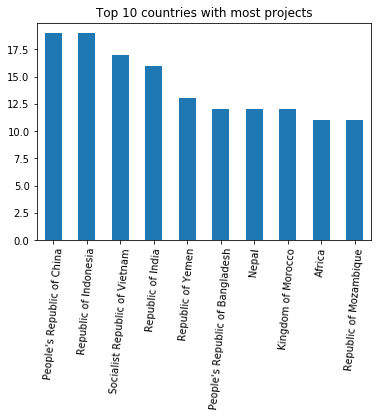

In [84]:
# plotting country vs. # of projects
import matplotlib.pyplot as plt
top_10_countries.plot(kind='bar')
plt.xticks(rotation = 85)
plt.title('Top 10 countries with most projects')

In [71]:
# loading json as string
worldbank_projects_string = json.load(open('data/world_bank_projects.json'))

In [82]:
# normalizing mjtheme_namecode column
namecode = json_normalize(worldbank_projects_string, 'mjtheme_namecode')
#namecode

In [73]:
# Top 10 major project themes (using column 'mjtheme_namecode')
major_project_themes = namecode['name'].value_counts()
major_project_themes.head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

Text(0.5, 1.0, 'Top 10 major project themes')

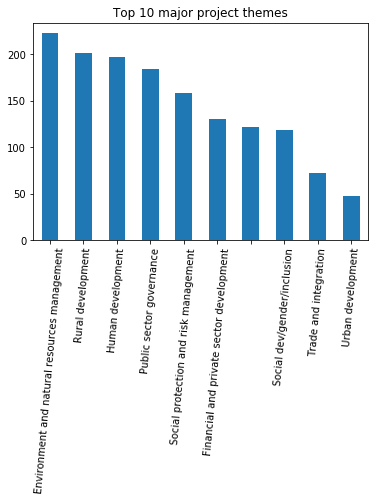

In [83]:
# plotting project theme vs. # of projects
major_project_themes.head(10).plot(kind='bar')
plt.xticks(rotation = 85)
plt.title('Top 10 major project themes')

In [75]:
# lets sort the name column to see if the missing values
namecode.name.sort_values()

1036                     
908                      
407                      
405                      
1277                     
              ...        
940     Urban development
570     Urban development
513     Urban development
1426    Urban development
930     Urban development
Name: name, Length: 1499, dtype: object

In [76]:
# Let's count the number of missing values
(namecode.name.values == '').sum()

122

In [77]:
# Let's replace the misisng values with NaNs
import numpy as np
namecode = namecode['name'].replace('', np.NaN)

In [78]:
namecode

0                              Human development
1                                            NaN
2                            Economic management
3          Social protection and risk management
4                          Trade and integration
                          ...                   
1494                           Rural development
1495                           Urban development
1496                           Human development
1497                       Trade and integration
1498    Financial and private sector development
Name: name, Length: 1499, dtype: object

In [79]:
# Now let's count the # of missing values after replacing missing values with NaNs
(namecode.values == '').sum()

0